<a href="https://colab.research.google.com/github/KatBCN/ML-PropertyAssessment/blob/main/ML_PropertyAssessment_Buffalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)  #set display to show all columns

Start by mounting Google Drive to import the data.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ML-Project/2019-2020_Assessment_Roll.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Summary of Data
The original data and metadata provided by the City of Buffalo are available at the [2019-2020 Property Assessment Data Website](https://internal.data.buffalony.gov/Government/2019-2020-Assessment-Roll/kckn-jafw).



There are over 93,000 rows and 51 columns.

In [5]:
print(df.shape)

(93862, 51)


In [6]:
print(df.columns)

Index(['SBL', 'Tax District', 'Print Key', 'Front', 'Depth', 'Property Class',
       'Property Class Description', 'Previous Property Class', 'Owner1',
       'Owner2', 'Previous Owner', 'Mail1', 'Mail2', 'Mail3', 'Mail4',
       'House Number', 'Street', 'Address', 'City', 'State', 'Zipcode',
       'Zipcode Extension', 'Deed Book', 'Deed Page', 'Deed Date', 'Roll',
       'Land Value', 'Total Value', 'Sale Price', 'Year Built',
       'First Story Area', 'Second Story Area', 'Total Living Area',
       'Overall Condition', 'Building Style', 'Heat Type', 'Basement Type',
       '# of Stories', '# of Fireplaces', '# of Beds', '# of Baths',
       '# of Kitchens', 'Council District', 'Police District', 'Census Tract',
       'Census Block Group', 'Census Block', 'Neighborhood', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


Numeric Variables (9): 
* Front (width measured in feet)
* Depth (depth measured in feet)
* Land Value (assessed value of just land)
* Total Value (assessed value of land and improvements)
* Sale Price (price last sold for)
* Total Living Area (amount of living space in square feet)
* Number of Fireplaces
* Number of Beds
* Number of Baths

Categorical Variables for Property Features (6):
* Property Class Description (text)
* Year Built
* Overall Condition
* Building Style (code with unknown interpretation)
* Heat Type (code with unknown interpretation)
* Basement Type (code with unknown interpretation)

Categorical Variables for Property Location (8):
* Tax District
* Zipcode
* Council District
* Police District
* Census Tract / Census Block Group / Census Block
* Neighborhood

Identifier Variable (1):
* SBL (unique)

Variables not likely to be used (24):
* Print Key (secondary format of SBL)
* Property Class (code) 
* Previous Property Class
* Owner1 / Owner2 / Previous Owner
* Mail1 / Mail2 / Mail3 / Mail4
* House Number / Street / Address / City / State
* Zipcode Extension
* Deed Book / Deed Page / Deed Date
* Roll
* First Story Area / Second Story Area (both missing)
* Number of Stories (missing)
* Number of Kitchens (missing)

Geospatial Varaiables (3):
* Latitude / Longitude / Location


In [7]:
print("Column datatypes:")
print(df.dtypes)

Column datatypes:
SBL                            object
Tax District                  float64
Print Key                      object
Front                         float64
Depth                         float64
Property Class                  int64
Property Class Description     object
Previous Property Class       float64
Owner1                         object
Owner2                         object
Previous Owner                float64
Mail1                          object
Mail2                          object
Mail3                          object
Mail4                          object
House Number                  float64
Street                         object
Address                        object
City                           object
State                          object
Zipcode                       float64
Zipcode Extension             float64
Deed Book                      object
Deed Page                      object
Deed Date                      object
Roll                            

There are several completely or nearly empty columns:
* Previous Owner
* Address
* Zipcode Extension
* First Story Area
* Second Story Area
* Number of Stories
* Number of Kitchens

Missing Values:

These missing values could be because there is no building present on the property.
* Year Built
* Overall Condition
* Building Style
* Heat Type
* Basement Type

In [8]:
print("Count of null values per column:")
print(df.isna().sum())

Count of null values per column:
SBL                               0
Tax District                      5
Print Key                         0
Front                             0
Depth                             0
Property Class                    0
Property Class Description        0
Previous Property Class         291
Owner1                            0
Owner2                        70037
Previous Owner                93862
Mail1                         89318
Mail2                         86694
Mail3                            13
Mail4                             8
House Number                      5
Street                            0
Address                       93756
City                              5
State                             5
Zipcode                          44
Zipcode Extension             93858
Deed Book                       235
Deed Page                       235
Deed Date                         0
Roll                              0
Land Value                     

* The feature 'Year Built' needs to be cleaned because non-year values are present.



In [9]:
df.describe(include="all")

,SBL,Tax District,Print Key,Front,Depth,Property Class,Property Class Description,Previous Property Class,Owner1,Owner2,Previous Owner,Mail1,Mail2,Mail3,Mail4,House Number,Street,Address,City,State,Zipcode,Zipcode Extension,Deed Book,Deed Page,Deed Date,Roll,Land Value,Total Value,Sale Price,Year Built,First Story Area,Second Story Area,Total Living Area,Overall Condition,Building Style,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Council District,Police District,Census Tract,Census Block Group,Census Block,Neighborhood,Latitude,Longitude,Location
count,93862,93857.000000,93862,93862.000000,93862.000000,93862.000000,93862,93571.000000,93862,23825,0.0,4544,7168,93849,93854,93857.000000,93862,106,93857,93857,93818.000000,4.000000,93627,93627.0,93862,93862.000000,9.386200e+04,9.386200e+04,9.386200e+04,67827.000000,0.0,0.0,93862.000000,67827.000000,67827.000000,67756.000000,67683.000000,0.0,93862.000000,93862.000000,93862.000000,0.0,93103,93103,93103,93103,93103,93103,93103.000000,93103.000000,93103
unique,93862,NaN,93862,NaN,NaN,NaN,147,NaN,66600,15666,NaN,2546,5017,63196,1895,NaN,1453,99,1,1,NaN,NaN,5625,21272.0,7609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,81,8,275,36,NaN,NaN,91697
top,1113100012001122A,NaN,111.31-12-1.122/A,NaN,NaN,NaN,ONE FAMILY DWELLING,NaN,CITY BUFFALO PERFECTING TITLE,TITLE,NaN,C/O DIVISION OF REAL ESTATE,LLC,65 NIAGARA SQ RM 901,"BUFFALO, NY",NaN,DELAWARE,65 WHITNEY,BUFFALO,NY,NaN,NaN,11324,3856.0,09/09/9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FILLMORE,District D,168,1,1001,Broadway Fillmore,NaN,NaN,"(42.91363099203083, -78.87031816798164)"
freq,1,NaN,1,NaN,NaN,NaN,37859,NaN,3199,2069,NaN,329,245,3717,75784,NaN,939,6,93857,93857,NaN,NaN,507,190.0,23304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15027,22346,2264,26889,3366,7862,NaN,NaN,447
mean,NaN,147008.330620,NaN,47.339433,119.618199,263.155548,NaN,262.991536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.601958,NaN,NaN,NaN,NaN,14211.796628,1627.750000,NaN,NaN,NaN,1.802806,1.264465e+04,1.140735e+05,5.259509e+04,1919.151031,NaN,NaN,1341.359016,2.975511,7.654297,2.071846,3.604967,NaN,0.108414,2.950480,1.152722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.908632,-78.844426,NaN
std,NaN,3.981637,NaN,336.930544,94.829635,98.655042,NaN,98.473096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.874162,NaN,NaN,NaN,NaN,5.033240,220.931928,NaN,NaN,NaN,2.222150,1.068279e+05,1.371201e+06,4.216895e+05,29.283161,NaN,NaN,1018.367034,0.363101,1.832832,0.418526,0.808858,NaN,0.393434,2.162006,0.881370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032226,0.029962,NaN
min,NaN,147001.000000,NaN,0.000000,0.000000,210.000000,NaN,210.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,14200.000000,1508.000000,NaN,NaN,NaN,1.000000,0.000000e+00,1.000000e+01,0.000000e+00,1.000000,NaN,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.828198,-78.909804,NaN
25%,NaN,147005.000000,NaN,30.000000,102.000000,210.000000,NaN,210.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,14208.000000,1518.500000,NaN,NaN,NaN,1.000000,2.500000e+03,1.940000e+04,1.000000e+00,1900.000000,NaN,NaN,0.000000,3.000000,8.000000,2.000000,4.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.890221,-78.868215,NaN
50%,NaN,147009.000000,NaN,33.000000,115.000000,220.000000,NaN,220.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.000000,NaN,NaN,NaN,NaN,14212.000000,1522.000000,NaN,NaN,NaN,1.000000,4.400000e+03,4.300000e+04,2.551500e+03,1920.000000,NaN,NaN,1410.000000,3.000000,8.000000,2.000000,4.000000,NaN,0.000000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.911926,-78.840769,NaN
75%,NaN,147011.000000,NaN,40.000000,132.000000,311.000000,NaN,311.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.000000,NaN,NaN,NaN,NaN,14215.000000,1631.250000,NaN,NaN,NaN,1.000000,7.200000e+03,7.190000e+04,5.100000e+04,1927.000000,NaN,NaN,2078.000000,3.000000,8.000000,2.000000,4.000000,N

In [10]:
df.head(5)

,SBL,Tax District,Print Key,Front,Depth,Property Class,Property Class Description,Previous Property Class,Owner1,Owner2,Previous Owner,Mail1,Mail2,Mail3,Mail4,House Number,Street,Address,City,State,Zipcode,Zipcode Extension,Deed Book,Deed Page,Deed Date,Roll,Land Value,Total Value,Sale Price,Year Built,First Story Area,Second Story Area,Total Living Area,Overall Condition,Building Style,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Council District,Police District,Census Tract,Census Block Group,Census Block,Neighborhood,Latitude,Longitude,Location
0,1113100012001122A,147003.0,111.31-12-1.122/A,0.00,0.00,873,GAS MEAS STATION,873.0,NATIONAL FUEL GAS DIST,CORP,NaN,NaN,NaN,6363 MAIN ST,"WILLIAMSVILLE, NY",725.0,WASHINGTON,NaN,BUFFALO,NY,14203.0,NaN,NaN,NaN,09/09/9999,6,0,13006,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1011500001001111,147012.0,101.15-1-1.111,0.00,0.00,330,COMMERCIAL VACANT LAND,330.0,"AROUND THE CLOCK CAR WASH,INC.",NaN,NaN,NaN,NaN,6547 EMILY LN,"LOCKPORT, NY",119.0,WEX,NaN,BUFFALO,NY,14211.0,NaN,11144,9356.0,09/09/9999,1,2900,2900,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0785000008001000,147009.0,78.50-8-1,65.00,82.57,311,RESIDENTIAL VACANT LAND,NaN,THE MARRANO/MARC-EQUITY CORP.,NaN,NaN,NaN,NaN,2730 TRANSIT RD,"WEST SENECA, NY",142.0,RACHEL VINCENT,NaN,BUFFALO,NY,14216.0,NaN,11331,1637.0,09/09/9999,1,1700,1700,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007300008009111,147003.0,100.73-8-9.111,50.00,200.00,311,RESIDENTIAL VACANT LAND,311.0,MARIAH LORETTA LLC,NaN,NaN,NaN,NaN,100 S WOODLAND RIDGE,"ELMA, NY",289.0,LOCUST,NaN,BUFFALO,NY,14204.0,NaN,11309,505.0,09/09/9999,1,3800,3800,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1321500002004000,147013.0,132.15-2-4,521.34,1184.60,340,INDUSTRIAL VACANT LAND,340.0,BUFFALO URBAN DEVELOPMENT CORP,NaN,NaN,NaN,NaN,275 OAK ST,"BUFFALO, NY",126.0,LABORERS WAY,NaN,BUFFALO,NY,14203.0,NaN,11125,6721.0,09/09/9999,8,337000,337000,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail(5)

,SBL,Tax District,Print Key,Front,Depth,Property Class,Property Class Description,Previous Property Class,Owner1,Owner2,Previous Owner,Mail1,Mail2,Mail3,Mail4,House Number,Street,Address,City,State,Zipcode,Zipcode Extension,Deed Book,Deed Page,Deed Date,Roll,Land Value,Total Value,Sale Price,Year Built,First Story Area,Second Story Area,Total Living Area,Overall Condition,Building Style,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Council District,Police District,Census Tract,Census Block Group,Census Block,Neighborhood,Latitude,Longitude,Location
93857,1113700006008000,147002.0,111.37-6-8,45.0,100.0,464,OFFICE BUILDING,464.0,THE EVERGREEN FOUNDATION,OF WESTERN NEW YORK INC,NaN,NaN,NaN,206 S ELMWOOD AVE,"BUFFALO, NY",200.0,ELMWOOD SOUTH,NaN,BUFFALO,NY,14201.0,NaN,10971,4414.0,09/15/2000,8,45000,230000,28000,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,FILLMORE,District B,71.02,2,2007,Lower West Side,42.890656,-78.878748,"(42.890655805428466, -78.87874772526237)"
93858,1005100001010000,147005.0,100.51-1-10,30.0,142.0,311,RESIDENTIAL VACANT LAND,311.0,CITY OF BUFFALO,PERFECTING TITLE,NaN,NaN,IN REM 33 #1831,65 NIAGARA SQ RM 901,"BUFFALO, NY",505.0,UTICA EAST,NaN,BUFFALO,NY,14208.0,NaN,10961,3180.0,09/09/9999,8,2100,2100,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,ELLICOTT,District C,33.02,2,2004,Masten Park,42.910763,-78.846938,"(42.91076310440764, -78.84693777163457)"
93859,0908300003045000,147011.0,90.83-3-45,30.0,111.0,220,TWO FAMILY DWELLING,220.0,OLEANDER REAL ESTATE LLC,NaN,NaN,NaN,NaN,194 BARTLETT AVE,TORONTO ONTARIO M6H 3G1,129.0,FISHER,NaN,BUFFALO,NY,14215.0,NaN,11229,6570.0,09/11/2012,1,2900,24000,29000,1924.0,NaN,NaN,1557,3.0,8.0,2.0,4.0,NaN,0,4,2.0,NaN,LOVEJOY,District E,38,1,1001,Schiller Park,42.921241,-78.800882,"(42.92124103390008, -78.80088212458827)"
93860,1337200001047000,147014.0,133.72-1-47,32.0,117.0,210,ONE FAMILY DWELLING,210.0,SCHENK JENNIFER L,NaN,NaN,NaN,NaN,590 MARILLA,"BUFFALO, NY",590.0,MARILLA,NaN,BUFFALO,NY,14220.0,NaN,11171,6897.0,10/22/2009,1,5400,69100,69000,1920.0,NaN,NaN,1258,3.0,8.0,2.0,3.0,NaN,0,3,1.0,NaN,SOUTH,District A,6,2,2005,South Park,42.837420,-78.818344,"(42.837419515191854, -78.81834363592974)"
93861,0784900005010000,147009.0,78.49-5-10,35.0,150.0,220,TWO FAMILY DWELLING,220.0,MARCHITTE JOSEPH A,NaN,NaN,NaN,NaN,472 COLVIN AVE,"BUFFALO, NY",472.0,COLVIN,NaN,BUFFALO,NY,14216.0,NaN,10932,5793.0,05/15/1998,1,11100,100000,67300,1925.0,NaN,NaN,2560,3.0,8.0,2.0,4.0,NaN,0,6,2.0,NaN,DELAWARE,District D,49,1,1004,North Park,42.953742,-78.859402,"(42.95374173725508, -78.8594023873921)"


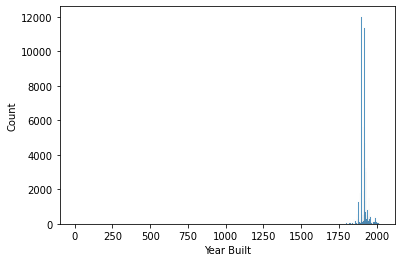

In [12]:
sns.histplot(x=df['Year Built'])

(array([9.3859e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  9714.7, 19429.4, 29144.1, 38858.8, 48573.5, 58288.2,
        68002.9, 77717.6, 87432.3, 97147. ]),
 <a list of 10 Patch objects>)

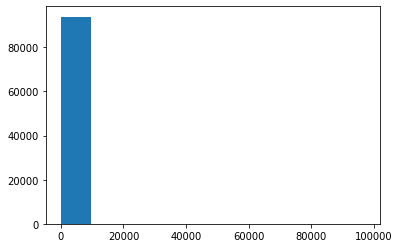

In [13]:
plt.hist(x=df.Front)

(array([9.3841e+04, 1.8000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([    0.,  1590.,  3180.,  4770.,  6360.,  7950.,  9540., 11130.,
        12720., 14310., 15900.]),
 <a list of 10 Patch objects>)

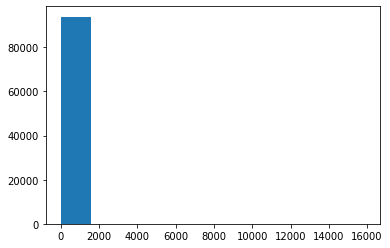

In [14]:
plt.hist(x=df.Depth)

In [37]:
df["Property Class Description"].value_counts()[:15]

ONE FAMILY DWELLING                         37859
TWO FAMILY DWELLING                         26654
RESIDENTIAL VACANT LAND                     13211
APARTMENT                                    2394
DOWNTOWN ROW TYPE (DETACHED)                 2080
COMMERCIAL VACANT LAND                       1659
THREE FAMILY DWELLING                        1362
COM VAC W/IMP                                1193
MULTIPLE RESIDENCES                          1150
RESIDENTIAL LAND WITH SMALL IMPROVEMENTS      777
OTHER STORAGE & WAREHOUSE FACILITIES          518
MANUFACTURING & PROCESSING                    477
INDUSTRIAL VACANT LAND                        472
RELIGIOUS                                     426
OFFICE BUILDING                               376
Name: Property Class Description, dtype: int64

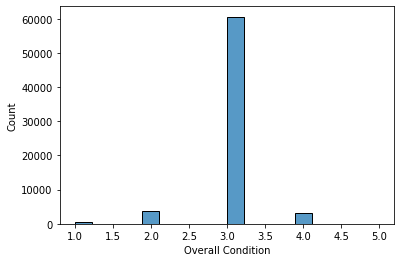

In [34]:
sns.histplot(x=df["Overall Condition"])

In [58]:
len(df["Zipcode"].unique())

22

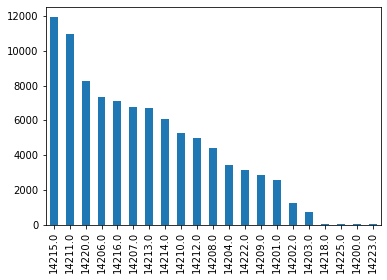

In [24]:
df["Zipcode"].value_counts().plot(kind = 'bar')

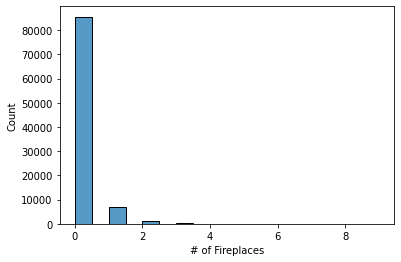

In [31]:
sns.histplot(x=df["# of Fireplaces"])

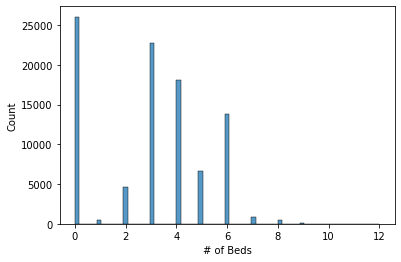

In [32]:
sns.histplot(x=df["# of Beds"])

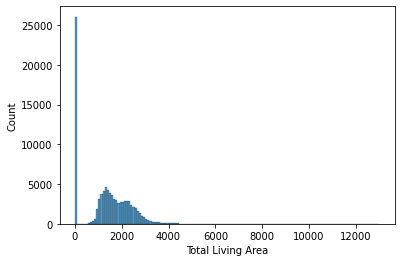

In [39]:
sns.histplot(x=df["Total Living Area"])

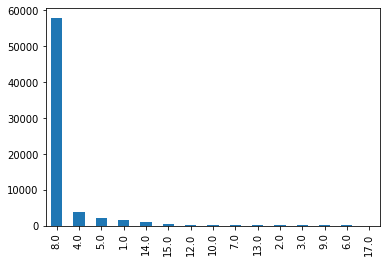

In [38]:
df["Building Style"].value_counts().plot(kind = 'bar')

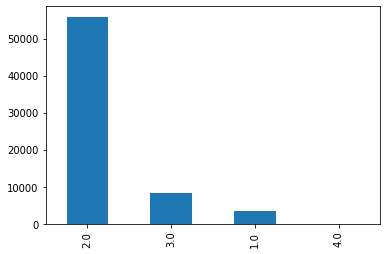

In [40]:
df["Heat Type"].value_counts().plot(kind = 'bar')

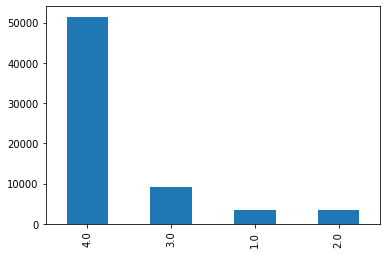

In [41]:
df["Basement Type"].value_counts().plot(kind = 'bar')

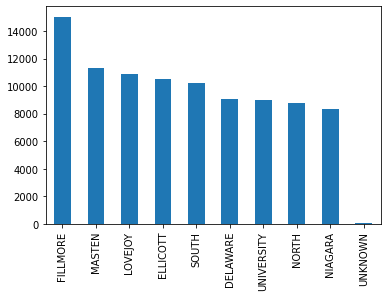

In [35]:
df["Council District"].value_counts().plot(kind = 'bar')

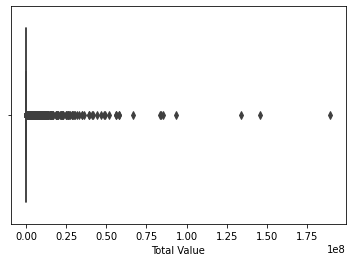

In [49]:
sns.boxplot(x=df["Total Value"])

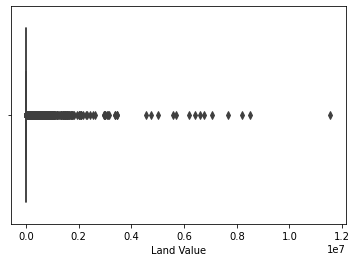

In [50]:
sns.boxplot(x=df["Land Value"])

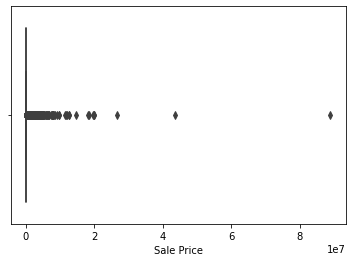

In [51]:
sns.boxplot(x=df["Sale Price"])

In [56]:
len(df["Year Built"].unique())

218

In [57]:
len(df["Tax District"].unique())

16